## Install and Import Libraries

In [4]:
# Install required modern ML library
%pip install catboost scikit-learn
%pip install seaborn matplotlib pandas

# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier, Pool



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Loading data


In [5]:
# Load dataset
df = pd.read_csv("/Users/sayenaqureshi/Main-Folder/notebook/Crop and fertilizer dataset (2).csv")

## Steps Taken in order to avoid data leakage


In [38]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoder = LabelEncoder()

# Encode ALL categorical columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = encoder.fit_transform(df_encoded[col])


In [8]:
print("Columns:", list(df.columns))
df.head()

Columns: ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer', 'Link']


,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


## Performing EDA


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB
None


### Checking for null values


In [10]:
print(df.isnull().sum())


District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64


###  Checking for Unique values

In [11]:
print("\nUnique value counts per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique value counts per column:
District_Name: 5 unique values
Soil_color: 7 unique values
Nitrogen: 27 unique values
Phosphorus: 17 unique values
Potassium: 30 unique values
pH: 7 unique values
Rainfall: 15 unique values
Temperature: 7 unique values
Crop: 16 unique values
Fertilizer: 19 unique values
Link: 278 unique values


### Droping for duplicate values

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

## Visualization

### Heatmap

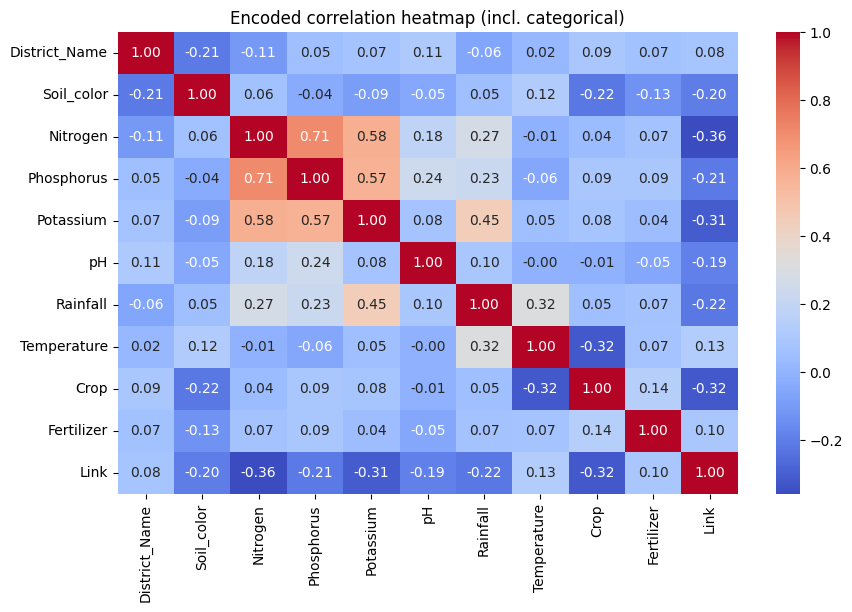

In [15]:
# Encode categorical columns
df_enc = df.copy()
for col in df_enc.select_dtypes(include='object'):
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

# Plot correlation heatmap with values
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_enc.corr(),
    cmap='coolwarm',
    annot=True,     # Show correlation values
    fmt='.2f',      # Two decimal places
    cbar=True
)
plt.title("Encoded correlation heatmap (incl. categorical)")
plt.show()

### Class Distribution of **crops**


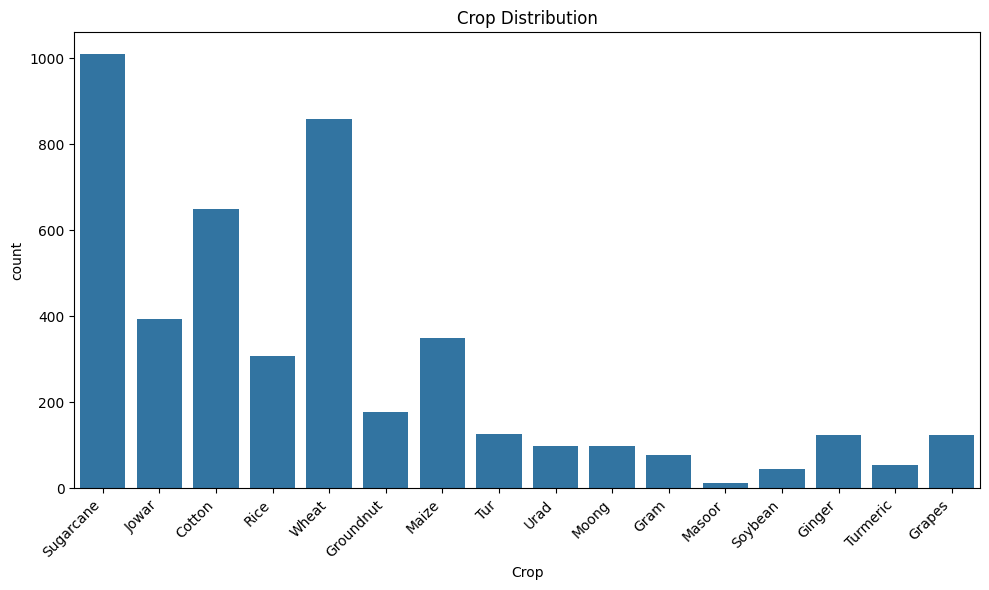

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Crop')
plt.title("Crop Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Class distribution of fertilizers


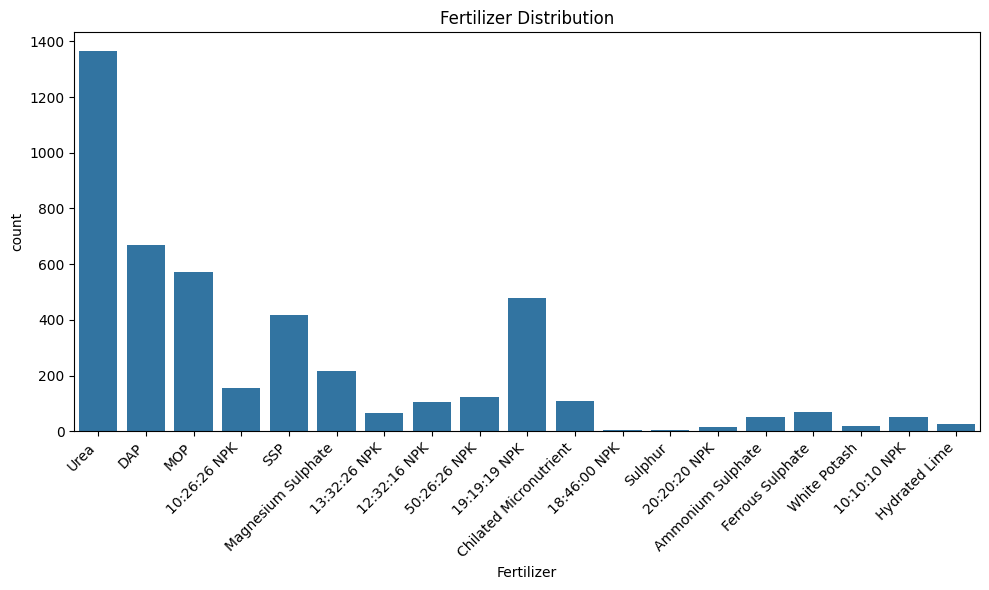

In [17]:
# Target distribution for Fertilizer
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fertilizer')
plt.title("Fertilizer Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plotting Boxplot

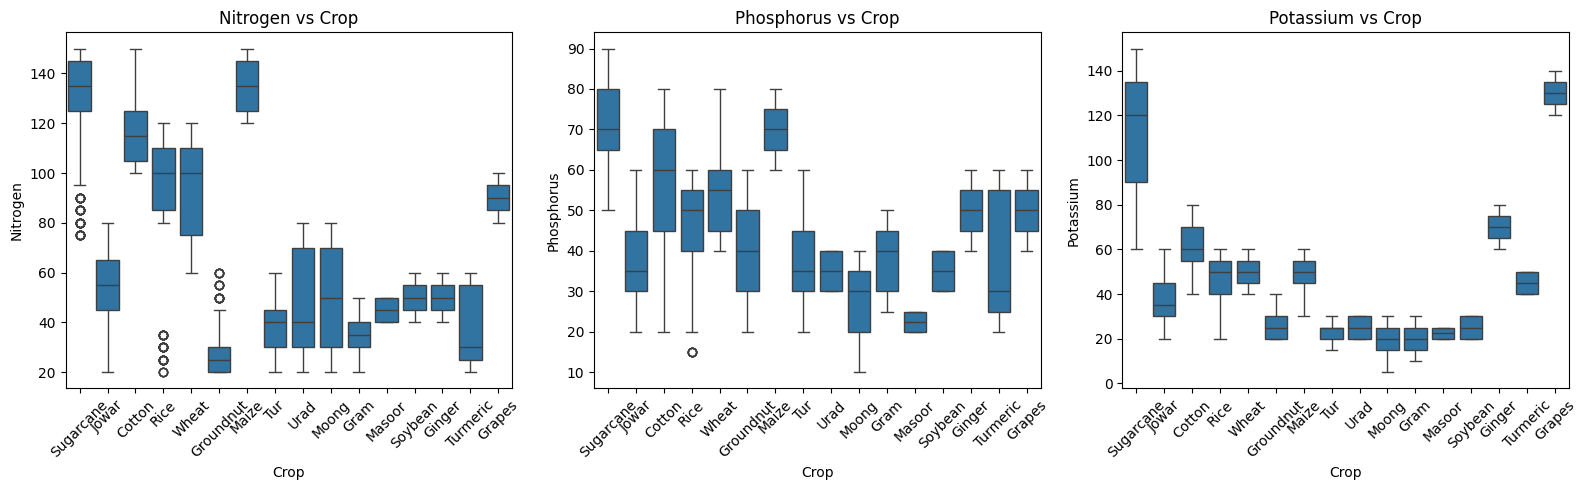

In [18]:
# 1) Boxplots: N, P, K vs Crop (spot differences by crop)
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for ax, feat in zip(axes, ['Nitrogen','Phosphorus','Potassium']):
    sns.boxplot(data=df, x='Crop', y=feat, ax=ax)
    ax.set_title(f"{feat} vs Crop")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

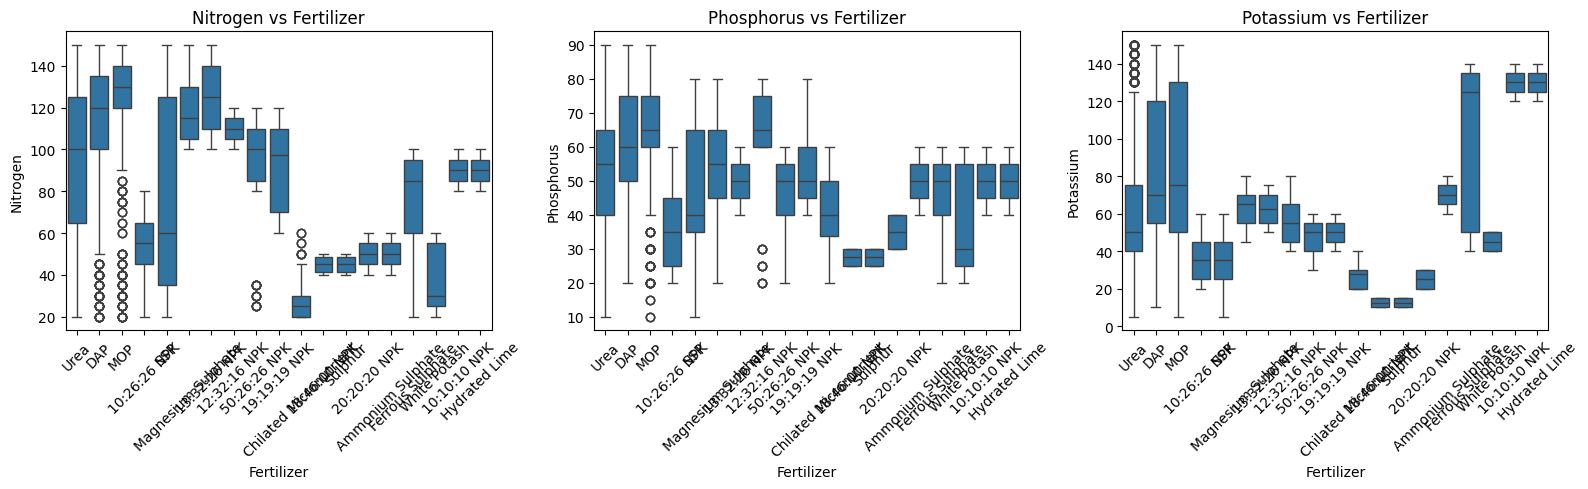

In [19]:
# 2) Boxplots: N, P, K vs Fertilizer (spot differences by fertilizer)
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for ax, feat in zip(axes, ['Nitrogen','Phosphorus','Potassium']):
    sns.boxplot(data=df, x='Fertilizer', y=feat, ax=ax)
    ax.set_title(f"{feat} vs Fertilizer")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


### Avg N, P, K by District

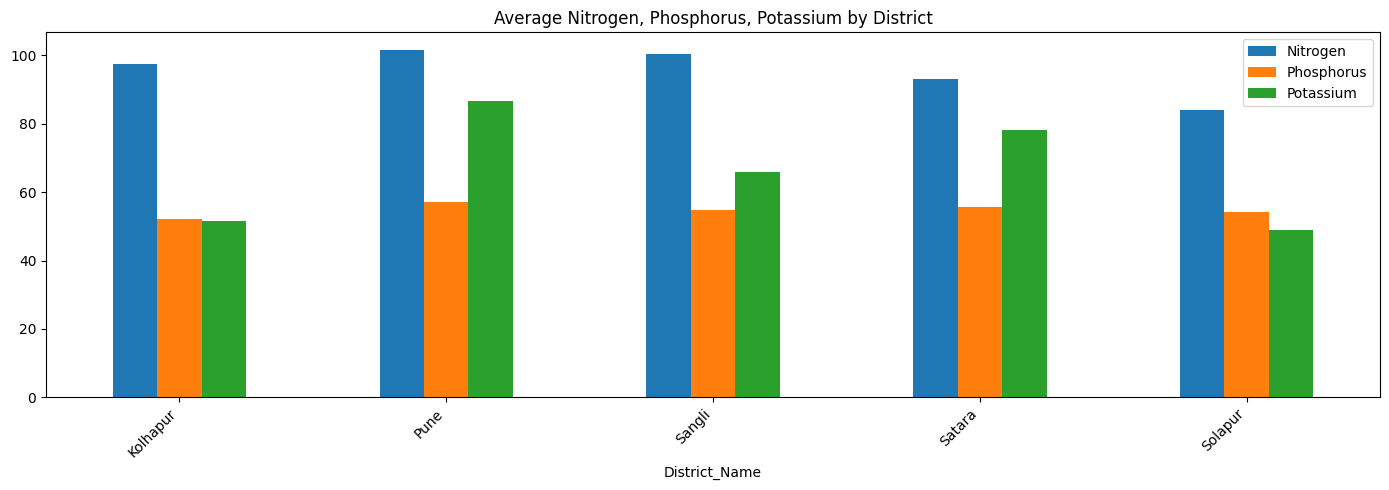

In [20]:
# 3) Average N, P, K by District (see regional patterns)
avg_npk = df.groupby('District_Name')[['Nitrogen','Phosphorus','Potassium']].mean().reset_index()
ax = avg_npk.plot(x='District_Name', kind='bar', figsize=(14,5))
plt.title("Average Nitrogen, Phosphorus, Potassium by District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Training Model

### Defining target variables

In [21]:
# Features & targets (use your exact column names)
feature_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'District_Name']
X = df[feature_cols].copy()
y_crop = df['Crop'].copy()
y_fert = df['Fertilizer'].copy()

cat_features_idx = [feature_cols.index('District_Name')]

### Encoding the categorical variable

In [22]:
# Label-encode targets (CatBoost accepts strings for y, but encoding helps reports)
from sklearn.preprocessing import LabelEncoder
le_crop = LabelEncoder()
le_fert = LabelEncoder()
y_crop_le = le_crop.fit_transform(y_crop)
y_fert_le = le_fert.fit_transform(y_fert)

### spliting into train and testing

In [23]:
from sklearn.model_selection import train_test_split

# Ensure District is treated as categorical (string)
X['District_Name'] = X['District_Name'].astype(str)

# Crop split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_crop_le, test_size=0.2, random_state=42, stratify=y_crop_le
)

# Fertilizer split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y_fert_le, test_size=0.2, random_state=42, stratify=y_fert_le
)


### Crop prediction model using CatBoost

In [24]:
# Prepare results list
results = []

In [25]:
from catboost import CatBoostClassifier, Pool

crop_train = Pool(X_train_c, y_train_c, cat_features=cat_features_idx)
crop_valid = Pool(X_test_c,  y_test_c,  cat_features=cat_features_idx)

crop_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=6,
    random_strength=0.5,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=False
)

crop_model.fit(
    crop_train,
    eval_set=crop_valid,
    use_best_model=True,
    early_stopping_rounds=50
)


### Fertiliser prediction model using CatBoost


In [26]:
fert_train = Pool(X_train_f, y_train_f, cat_features=cat_features_idx)
fert_valid = Pool(X_test_f,  y_test_f,  cat_features=cat_features_idx)

fert_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=6,
    random_strength=0.5,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=False
)

fert_model.fit(
    fert_train,
    eval_set=fert_valid,
    use_best_model=True,
    early_stopping_rounds=50
)


## Model Evaluation

In [27]:

# Crop
y_pred_c = crop_model.predict(X_test_c)
print("\nCrop Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(le_crop.inverse_transform(y_test_c),
                            le_crop.inverse_transform(y_pred_c)))

# Fertilizer
y_pred_f = fert_model.predict(X_test_f)
print("\nFertilizer Accuracy:", accuracy_score(y_test_f, y_pred_f))
print(classification_report(le_fert.inverse_transform(y_test_f),
                            le_fert.inverse_transform(y_pred_f)))



Crop Accuracy: 0.8150609080841639
              precision    recall  f1-score   support

      Cotton       0.76      0.72      0.74       130
      Ginger       0.89      1.00      0.94        25
        Gram       0.59      1.00      0.74        16
      Grapes       1.00      1.00      1.00        25
   Groundnut       0.90      0.54      0.68        35
       Jowar       0.93      0.85      0.89        79
       Maize       0.75      0.99      0.85        70
      Masoor       0.20      1.00      0.33         2
       Moong       0.67      0.70      0.68        20
        Rice       0.66      0.98      0.79        62
     Soybean       0.56      1.00      0.72         9
   Sugarcane       1.00      0.95      0.97       202
         Tur       0.93      0.56      0.70        25
    Turmeric       0.65      1.00      0.79        11
        Urad       0.55      0.60      0.57        20
       Wheat       0.82      0.62      0.70       172

    accuracy                           0.82  

/Users/sayenaqureshi/myenv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sayenaqureshi/myenv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sayenaqureshi/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sayenaqureshi/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: Un

# Applying more algo's

## LightGBM

In [28]:
!pip install pytorch-tabnet


  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.5 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.2 MB/s eta 0:00:00a 0:00:01
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [32]:
!pip install lightgbm xgboost pytorch-tabnet scikit-learn pandas torch

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd



  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [39]:

# -------------------
# 1️⃣ LightGBM
# -------------------
X_crop_enc = df_encoded.drop(columns=["Crop", "Fertilizer"])
y_crop_enc = df_encoded["Crop"]

X_train_c_enc, X_test_c_enc, y_train_c_enc, y_test_c_enc = train_test_split(
    X_crop_enc, y_crop_enc, test_size=0.2, random_state=42, stratify=y_crop_enc
)
lgb_crop = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=31,
                           subsample=0.8, colsample_bytree=0.8, class_weight='balanced', random_state=42)
lgb_crop.fit(X_train_c_enc, y_train_c_enc)
pred_lgb_crop = lgb_crop.predict(X_test_c_enc)
results.append(["Crop", "LightGBM",
                accuracy_score(y_test_c_enc, pred_lgb_crop),
                f1_score(y_test_c_enc, pred_lgb_crop, average='macro')])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 3610, number of used features: 9
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [

## XGBoost

In [40]:
# XGBoost (encoded data)
xgb_crop = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                         subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric='mlogloss')
xgb_crop.fit(X_train_c_enc, y_train_c_enc)
pred_xgb_crop = xgb_crop.predict(X_test_c_enc)
results.append(["Crop", "XGBoost",
                accuracy_score(y_test_c_enc, pred_xgb_crop),
                f1_score(y_test_c_enc, pred_xgb_crop, average='macro')])


In [42]:
X_crop_enc = df_encoded.drop(columns=["Crop", "Fertilizer"])
y_crop_enc = df_encoded["Crop"]

X_train_c_enc, X_test_c_enc, y_train_c_enc, y_test_c_enc = train_test_split(
    X_crop_enc, y_crop_enc, test_size=0.2, random_state=42, stratify=y_crop_enc
)


# Show result

In [43]:
results_df = pd.DataFrame(results, columns=["Target", "Model", "Accuracy", "Macro-F1"])
print(results_df)

  Target     Model  Accuracy  Macro-F1
0   Crop  LightGBM       1.0       1.0
1   Crop   XGBoost       1.0       1.0
2   Crop  LightGBM       1.0       1.0
3   Crop   XGBoost       1.0       1.0


## Fertilizer Prediction

In [44]:
# LightGBM (encoded data)
X_fert_enc = df_encoded.drop(columns=["Crop", "Fertilizer"])
y_fert_enc = df_encoded["Fertilizer"]

X_train_f_enc, X_test_f_enc, y_train_f_enc, y_test_f_enc = train_test_split(
    X_fert_enc, y_fert_enc, test_size=0.2, random_state=42, stratify=y_fert_enc
)
lgb_fert = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=31,
                          subsample=0.8, colsample_bytree=0.8, class_weight='balanced', random_state=42)
lgb_fert.fit(X_train_f_enc, y_train_f_enc)
pred_lgb_fert = lgb_fert.predict(X_test_f_enc)
results.append(["Fertilizer", "LightGBM",
                accuracy_score(y_test_f_enc, pred_lgb_fert),
                f1_score(y_test_f_enc, pred_lgb_fert, average='macro')])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3610, number of used features: 9
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [

## Making predictiions for new inputs


In [49]:
# Show valid districts to guide user input
print("Sample Districts:", list(df['District_Name'].astype(str).unique())[:10], "...")

# Use union of crop and fertilizer features so both models get the right inputs
feature_cols = list(set(X_train_c.columns) | set(X_train_f.columns))

print("\nEnter details to predict Crop and Fertilizer:")
input_values = []
for col in feature_cols:
    val = input(f"Enter {col}: ")
    # cast numerics to float; keep District and Soil as string
    if col in ['Nitrogen', 'Phosphorus', 'Potassium']:
        val = float(val)
    else:
        val = str(val)
    input_values.append(val)

# Create DataFrame with the exact same columns and order
user_df = pd.DataFrame([input_values], columns=feature_cols)
user_df['District_Name'] = user_df['District_Name'].astype(str)

# Align columns for each model (crop and fertilizer may differ slightly)
user_df_crop = user_df[X_train_c.columns]
user_df_fert = user_df[X_train_f.columns]

# Predict Crop
pred_crop = crop_model.predict(user_df_crop)[0]
pred_crop_label = le_crop.inverse_transform([pred_crop])[0]

# Predict Fertilizer
pred_fert = fert_model.predict(user_df_fert)[0]
pred_fert_label = le_fert.inverse_transform([pred_fert])[0]

# Show predictions
print(f"\n✅ Predicted Crop: {pred_crop_label}")
print(f"✅ Predicted Fertilizer: {pred_fert_label}")


Sample Districts: ['Kolhapur', 'Solapur', 'Satara', 'Sangli', 'Pune'] ...

Enter details to predict Crop and Fertilizer:


ValueError: could not convert string to float: ''